In [1]:
# 필요한 라이브러리 호출

import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

Init Plugin
Init Graph Optimizer
Init Kernel


In [5]:
# 데이터 호출

cols = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety', 'output']
cars = pd.read_csv('data/car_evaluation.csv', names=cols, header=None)

<AxesSubplot:ylabel='output'>

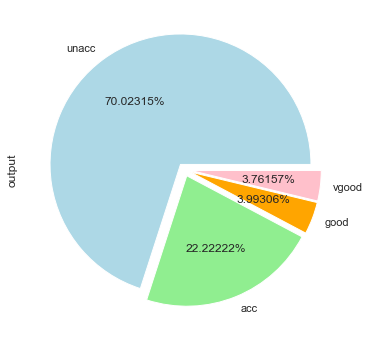

In [6]:
# 예제 데이터셋 분포

plot_size = plt.rcParams["figure.figsize"]
plot_size [0] = 8
plot_size [1] = 6
plt.rcParams["figure.figsize"] = plot_size
cars.output.value_counts().plot(kind='pie', autopct='%0.05f%%', colors=['lightblue', 'lightgreen', 'orange', 'pink'], explode=(0.05, 0.05, 0.05, 0.05))

In [7]:
# One-hot Encoding

price = pd.get_dummies(cars.price, prefix='price')
maint = pd.get_dummies(cars.maint, prefix='maint')

doors = pd.get_dummies(cars.doors, prefix='doors')
persons = pd.get_dummies(cars.persons, prefix='persons')

lug_capacity = pd.get_dummies(cars.lug_capacity, prefix='lug_capacity')
safety = pd.get_dummies(cars.safety, prefix='safety')

labels = pd.get_dummies(cars.output, prefix='condition')

X = pd.concat([price, maint, doors, persons, lug_capacity, safety], axis=1)
y = labels.values

In [8]:
X

price_high  price_low  price_med  price_vhigh  maint_high  maint_low  \
0              0          0          0            1           0          0   
1              0          0          0            1           0          0   
2              0          0          0            1           0          0   
3              0          0          0            1           0          0   
4              0          0          0            1           0          0   
...          ...        ...        ...          ...         ...        ...   
1723           0          1          0            0           0          1   
1724           0          1          0            0           0          1   
1725           0          1          0            0           0          1   
1726           0          1          0            0           0          1   
1727           0          1          0            0           0          1   

      maint_med  maint_vhigh  doors_2  doors_3  ...  doors_5more  persons_2  \
0             0            1        1        0  ...            0          1   
1             0            1        1        0  ...            0          1   
2             0            1        1        0  ...            0          1   
3             0            1        1        0  ...            0          1   
4             0            1        1        0  ...            0          1   
...         ...          ...      ...      ...  ...          ...        ...   
1723          0            0        0        0  ...            1          0   
1724          0            0        0        0  ...            1          0   
1725          0            0        0        0  ...            1          0   
1726          0            0        0        0  ...            1          0   
1727          0            0        0        0  ...            1          0   

      persons_4  persons_more  lug_capacity_big  lug_capacity_med  \
0             0             0                 0                 0   
1             0             0                 0                 0   
2             0             0                 0                 0   
3             0             0                 0                 1   
4             0             0                 0                 1   
...         ...           ...               ...               ...   
1723          0             1                 0                 1   
1724          0             1                 0                 1   
1725          0             1                 1                 0   
1726          0             1                 1                 0   
1727          0             1                 1                 0   

      lug_capacity_small  safety_high  safety_low  safety_med  
0                      1            0           1           0  
1                      1            0           0           1  
2                      1            1           0           0  
3                      0            0           1           0  
4                      0            0           0           1  
...                  ...          ...         ...         ...  
1723                   0            0           0           1  
1724                   0            1           0           0  
1725                   0            0           1           0  
1726                   0            0           0           1  
1727                   0            1           0           0  

[1728 rows x 21 columns]

In [9]:
# 훈련과 검증 데이터셋으로 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [11]:
# 모델 생성 및 컴파일
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model

input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(15, activation='relu')(input_layer)
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)
output = Dense(y.shape[1], activation='softmax')(dense_layer_2)

model = Model(inputs=input_layer, outputs=output)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

Metal device set to: Apple M1
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 21)]              0         
_________________________________________________________________
dense (Dense)                (None, 15)                330       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 44        
Total params: 534
Trainable params: 534
Non-trainable params: 0
_________________________________________________________________


2022-05-09 15:57:00.370926: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-09 15:57:00.371349: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [12]:
# 모델 훈련

history = model.fit(X_train, y_train, batch_size=8, epochs=50, verbose=1, validation_split=0.2)

2022-05-09 16:00:02.505113: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-05-09 16:00:02.507874: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-09 16:00:02.634377: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/50
139/139 [==============================] - ETA: 0s - loss: 1.0133 - acc: 0.6778

2022-05-09 16:00:06.397909: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


139/139 [==============================] - 4s 14ms/step - loss: 1.0133 - acc: 0.6778 - val_loss: 0.8804 - val_acc: 0.6498
Epoch 2/50
139/139 [==============================] - 1s 6ms/step - loss: 0.6413 - acc: 0.7213 - val_loss: 0.6658 - val_acc: 0.6787
Epoch 3/50
139/139 [==============================] - 1s 6ms/step - loss: 0.4720 - acc: 0.7855 - val_loss: 0.5153 - val_acc: 0.7545
Epoch 4/50
139/139 [==============================] - 1s 6ms/step - loss: 0.3662 - acc: 0.8715 - val_loss: 0.4332 - val_acc: 0.7942
Epoch 5/50
139/139 [==============================] - 1s 6ms/step - loss: 0.3144 - acc: 0.8805 - val_loss: 0.3878 - val_acc: 0.8051
Epoch 6/50
139/139 [==============================] - 1s 6ms/step - loss: 0.2783 - acc: 0.8914 - val_loss: 0.3492 - val_acc: 0.8375
Epoch 7/50
139/139 [==============================] - 1s 6ms/step - loss: 0.2507 - acc: 0.8941 - val_loss: 0.3133 - val_acc: 0.8845
Epoch 8/50
139/139 [==============================] - 1s 6ms/step - loss: 0.2233 - acc

In [13]:
# 모델 평가

score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy", score[1])

11/11 [==============================] - 0s 5ms/step - loss: 0.0640 - acc: 0.9740
Test Score: 0.06399811804294586
Test Accuracy 0.97398841381073


In [14]:
# True  Positive: 예측값: 1 & 실제값: 1
# True  Negative: 예측값: 0 & 실제값: 0
# False Positive: 예측값: 1 & 실제값: 0
# False Negative: 예측값: 0 & 실제값: 1

In [15]:
# 정확도(accuracy)  : (TP+TN)/(TP+TN+FP+FN)
# 재현율(recall)    : TP/(TP+FN) -> 실제로 정답이 1이라고 할 때 모델도 1로 예측한 비율
# 정밀도(precision) : TP/(TP+FP) -> 모델이 1이라고 예측한 것 중에서 실제로 정답이 1인 비율

# F1-Score : 1 / (1/Precision + 1/Recall)